# Groupe: GRP889BJ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline 

On considère 3 fonctions 
\begin{eqnarray}
quad: R^n\rightarrow R, \quad quad(X)&=&\frac{1}{2}\langle Ax,x\rangle+\langle b,x\rangle,\quad A\in S^n_{++},~b\in R^n
\end{eqnarray}
\begin{eqnarray}
f24:R^2\rightarrow R, \quad f24(X)&=& {(x_1-2)^2+(x_2-3)^4},
\\
rast: R^n\rightarrow  R,\quad rast(X)&=&n+||X||^2-\sum_{i=1}^n\cos(\beta x_i), \mbox{ avec } \beta=5.
\end{eqnarray}

"Rastrigin"


Initialiser une matrice $A$ et deux  vecteurs $b$  et $x$ pour $n=2$. 
Définir la fonction  Quad_A_b(x)

In [2]:
A=np.array([[3, -0.2],[-0.2,2]])
b=np.array([1,2])

def quad(x,A,b):
    return 0.5*A.dot(x).dot(x)+b.dot(x)

def quad_A_b(x):
    return quad(x,A,b)

 On resoud l'equation $AX= b$

In [3]:
Xex=np.linalg.solve(A,-b)
print(" solution of linear system Ax=b =",Xex)

print(" eigenvalues of A =", np.linalg.eig(A))

 solution of linear system Ax=b = [-0.40268456 -1.04026846]
 eigenvalues of A = (array([3.03851648, 1.96148352]), array([[ 0.98195639,  0.18910752],
       [-0.18910752,  0.98195639]]))


## 1 - On definit une fonction affichant le graphe et les isovaleurs d'une fonction passée en argument

In [64]:
def plot_function(fun,center,dimensions):
    n1=dimensions[0]
    n2=dimensions[1]
    x1_=np.linspace(-(center[0]+100),center[0]+100,n1)
    x2_=np.linspace(-(center[1]+100),center[1]+100,n2)
    # this square contains the interesting point [-0.40 -1.04]
    s_=np.zeros((n2,n1))  # s for "surface"
    sx1_,sx2_=np.meshgrid(x1_,x2_) # computes tensor products of x1 and x2
    for i in range(n1):
        for j in range (n2):
            s_[j,i]=fun([x1_[i],x2_[j]])

    fig = plt.figure()
    fig.clf()

    ax = fig.add_subplot(121, projection='3d')
     #ax.plot_surface(sx1_,sx2_,s_)

    ax.plot_surface(sx1_,sx2_,s_,rstride=1, cstride=1, 
    cmap=cm.coolwarm,linewidth=0, antialiased=False)
        
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f')
    ax.set_title('graphe de la fonction')
    ay = fig.add_subplot(122)

    ay.contour(sx1_,sx2_,s_)
    ay.plot([center[0]],[center[1]],'xr')
    ay.set_xlabel('x1')
    ay.set_ylabel('x2')
    ay.set_title('Isovaleur de la fonction')
    # nom de la fonction
    # centre de la zone (liste ou np.array de longueur 2)
    # dimensions de la zone (liste ou np.array de longueur 2)
    # votre code ci-dessous
    

# 2- Représenter le graphe de la fonction quad

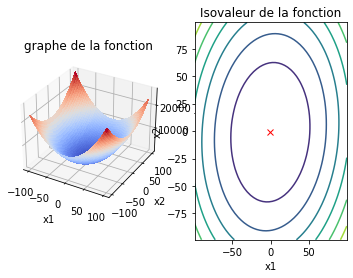

In [65]:
plot_function(quad_A_b,[-0.40,-1.04],[50,50])

Représenter le graphe et les isovaleurs des fonctions $f23(x1,x2)$ et $rast(x1,x2)$ pour une plage de coordonnées intéressantes. Pour chacune des trois fonctions, rajouter une croix rouge à la position du minimum global, calculée directement.

## 3- Représenter le graphe et les isovaleurs des fonctions  $𝑓23(𝑥1,𝑥2)$  et  $𝑟𝑎𝑠𝑡(𝑥1,𝑥2)$
\begin{eqnarray}
f24:R^2\rightarrow R, \quad f24(X)&=& {(x_1-2)^2+(x_2-3)^4}
\\
rast: R^n\rightarrow  R,\quad rast(X)&=&n+||X||^2-\sum_{i=1}^n\cos(\beta x_i), \mbox{ avec } \beta=5
\end{eqnarray}

In [66]:
def f24(x):
    return (x[0]-2)**2+(x[1]-3)**4

def rast_2(x):
    return 2+np.dot(x,x)-sum(np.cos(5*x))

## Pour la fonction \begin{eqnarray}
f24:R^2\rightarrow R, \quad f24(X)&=& {(x_1-2)^2+(x_2-3)^4} \end{eqnarray}

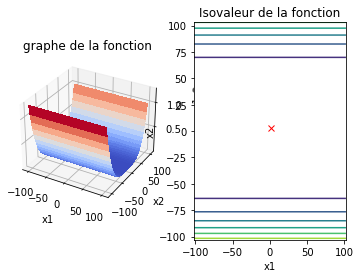

In [67]:
plot_function(f24,[2,3],[50,50]) ## [2,3] est la solution du gradient

## Pour la fonction \begin{eqnarray}
rast(X)&=&n+||X||^2-\sum_{i=1}^n\cos(\beta x_i), \mbox{ avec } \beta=5\end{eqnarray}

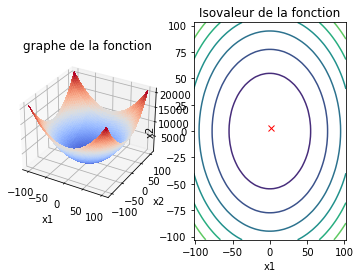

In [68]:
plot_function(rast_2,[2,3],[60,60]) ## [0,0] est la solution du gradient pour la fonction rat avec n=2

## 4- Tester la fonction Gradient_pas_fixe sur les 3 cas test, faire varier la position de départ, comparer le nombre d'itérations,

### Pour la fonction $quadratique$

In [69]:
def Gradient_pas_fixe(fun,gradfun, x0,alpha,eps,k_max):
    gk=gradfun(x0)
    k=0
    while (np.linalg.norm(gk)>eps) & (k<k_max):
        x0=x0 -alpha*gk
        gk=gradfun(x0)
        k=k+1
    if k==k_max:
        print(' gradient_pas_fixe n''a pas convergé ')    
    return x0,fun(x0),gk,k

In [70]:

def grad_quad_A_b(x):
    return A.dot(x)+b

x0=np.array([1.5,2.3])
alpha=.5
eps=0.0001
k_max=100
sol=Gradient_pas_fixe(quad_A_b,grad_quad_A_b,x0,alpha,eps,k_max)

print ('minimum en =',sol[0],' valeur exacte ',Xex)
print ('valeur minimum de f =',sol[1])
print ('valeur du gradient au minimum de f =',sol[2])
print ("nombre d'iterations ",sol[3])

minimum en = [-0.40270218 -1.04026506]  valeur exacte  [-0.40268456 -1.04026846]
valeur minimum de f = -1.241610737766174
valeur du gradient au minimum de f = [-5.35217211e-05  1.03073417e-05]
nombre d'iterations  17



#### Pour la fonction \begin{eqnarray}
f24:R^2\rightarrow R, \quad f24(X)&=& {(x_1-2)^2+(x_2-3)^4} \end{eqnarray}

In [71]:
def f24(x):
    return (x[0]-2)**2+(x[1]-3)**4


def grad_f24(x):
    return np.array([2*(x[0]-2),4*(x[1]-3)**3])

x0=np.array([20,2.3])
alpha=.5
eps=0.0001
k_max=100
sol2=Gradient_pas_fixe(f24,grad_f24,x0,alpha,eps,k_max)

print ('minimum en =',sol2[0],' valeur exacte ',[2,3])
print ('valeur minimum de f =',sol2[1])
print ('valeur du gradient au minimum de f =',sol2[2])
print ("nombre d'iterations ",sol2[3])

minimum en = [2.    2.986]  valeur exacte  [2, 3]
valeur minimum de f = 3.84159999999977e-08
valeur du gradient au minimum de f = [ 0.0000e+00 -1.0976e-05]
nombre d'iterations  1


In [72]:

x0=np.array([2,2.3])
alpha=.5
eps=0.0001
k_max=100
sol2=Gradient_pas_fixe(f24,grad_f24,x0,alpha,eps,k_max)

print ('minimum en =',sol2[0],' valeur exacte ',[2,3])
print ('valeur minimum de f =',sol2[1])
print ('valeur du gradient au minimum de f =',sol2[2])
print ("nombre d'iterations ",sol2[3])

minimum en = [2.    2.986]  valeur exacte  [2, 3]
valeur minimum de f = 3.84159999999977e-08
valeur du gradient au minimum de f = [ 0.0000e+00 -1.0976e-05]
nombre d'iterations  1


### Pour des valeurs differentes e $x_0$ on obtient toujours une seul iteraction

Pour la fonction \begin{eqnarray}
rast(X)&=&n+||X||^2-\sum_{i=1}^n\cos(\beta x_i), \mbox{ avec } \beta=5\end{eqnarray}

In [60]:
def grad_rast_2(x):
    return np.array([2*x[0]+5*np.sin(5*x[0]),2*x[1]+5*np.sin(5*x[1])])


x0=np.array([-10,2.3])
alpha=.5
eps=0.0001
k_max=100
sol3=Gradient_pas_fixe(rast_2,grad_rast_2,x0,alpha,eps,k_max)

print ('minimum en =',sol[0],' valeur exacte ',[0,0])
print ('valeur minimum de f =',sol[1])
print ('valeur du gradient au minimum de f =',sol[2])
print ("nombre d'iterations ",sol3[3])

 gradient_pas_fixe na pas convergé 
minimum en = [-0.40270218 -1.04026506]  valeur exacte  [0, 0]
valeur minimum de f = -1.241610737766174
valeur du gradient au minimum de f = [-5.35217211e-05  1.03073417e-05]
nombre d'iterations  100


In [74]:
x0=np.array([1.5,2.3])
alpha=.005
eps=0.0001
k_max=100
sol3=Gradient_pas_fixe(rast_2,grad_rast_2,x0,alpha,eps,k_max)

print ('minimum en =',sol[0],' valeur exacte ',[0,0])
print ('valeur minimum de f =',sol[1])
print ('valeur du gradient au minimum de f =',sol[2])
print ("nombre d'iterations ",sol3[3])

 gradient_pas_fixe na pas convergé 
minimum en = [-0.40270218 -1.04026506]  valeur exacte  [0, 0]
valeur minimum de f = -1.241610737766174
valeur du gradient au minimum de f = [-5.35217211e-05  1.03073417e-05]
nombre d'iterations  100


### La fonction $Rast$ ne converge pas 

### 5- Tester sur les 3 fonctions quad(𝑥1,𝑥2), 𝑓23(𝑥1,𝑥2) et 𝑟𝑎𝑠𝑡(𝑥1,𝑥2), une fonction qui superpose les itérations successives aux isovaleurs de la fonction

In [61]:
def Gradient_pas_variable_hist(fun,gradfun, x0,eps,k_max):
    gk=gradfun(x0)
    k=0
    hist=[x0]
    while (np.linalg.norm(gk)>eps) & (k<k_max):
        # compute the step alpha with armijo rule
        dk=-gk
        alpha,k_armijo=Armijo(fun,x0,dk,gk)
        print('alpha=',alpha, 'x0',x0)
        x0=x0 +alpha*dk
        hist.append(x0)
        gk=gradfun(x0)
        k=k+1
    if k==k_max:
        print(' gradient_pas_fixe n''a pas convergé ')    
    return x0,fun(x0),gk,k, hist

In [62]:
def Gradient_pas_fixe_hist(fun,gradfun, x0,alpha,eps,k_max):
    # fun : nom de la fonction à minimiser    
    # gradfun : nom de la fonction renvoyant le gradient à minimiser
    # x0 : position du point initial
    # alpha : le pas fixe
    # eps : tolerance sur le pas entre deux itérations successives
    # k_max = nombre maximum d'iterations
    #
    # en sortie renvoie un tuple contenant :
    # x_star : la position du minimum
    # f_star : la valeur de la fonction au minimum
    # g_star : la valeur du gradient de la fonction au minimum
    # iter : le nombre d'iterations 
    # hist (for history): une liste contenant les valeurs successives de x_k
    gk=gradfun(x0)
    k=0
    hist=[x0]
    while (np.linalg.norm(gk)>eps) & (k<k_max):
        #dk =-gk
        x0=x0 -alpha*gk
        hist.append(x0)
        gk=gradfun(x0)
        k=k+1
    if k==k_max:
        print(' gradient_pas_fixe n''a pas convergé ')    
    return x0,fun(x0),gk,k, hist

    
  

In [63]:
def plot_hist(fun,center,dimensions,hist):
    # fun : nom de la fonction
    # center : centre de la zone (liste ou np.array de longueur 2)
    # dimensions : dimensions de la zone (liste ou np.array de longueur 2)
    # hist : une liste de positions 
    # votre code ci-dessous
    n1=50
    n2=40
    x1_=np.linspace(center[0]-dimensions[0],center[0]+dimensions[0],n1)
    x2_=np.linspace(center[1]-dimensions[1],center[1]+dimensions[1],n2)
    s_=np.zeros((n2,n1))  # s for "surface"
    sx1_,sx2_=np.meshgrid(x1_,x2_) # computes tensor products of x1 and x2
    for i in range(n1):
        for j in range (n2):
            s_[j,i]=fun(np.array([x1_[i],x2_[j]]))

    fig = plt.figure()
    fig.clf()
    plt.contour(sx1_,sx2_,s_)
    xh1=[h[0] for h in hist]
    xh2=[h[1] for h in hist]
    plt.plot(xh1,xh2,'x-k')
#    for h in hist:
#        plt.plot([h[0]],[h[1]],'x-k')
    plt.plot([xh1[-1]],[xh2[-1]],'xr',label='xstar')    
    plt.plot([xh1[0]],[xh2[0]],'ob',label='x0')
    plt.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')

### Pour la fonction Fonction quadratique

In [21]:
x0=np.array([1.5,2.3])
alpha=.5
eps=0.0001
k_max=100


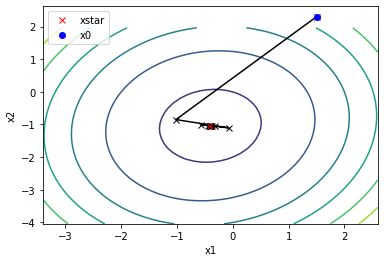

In [22]:
sol=Gradient_pas_fixe_hist(quad_A_b,grad_quad_A_b,x0,alpha,eps,k_max)
plot_hist(quad_A_b,Xex,[-3,3],sol[4])

## Pour la fonction \begin{eqnarray}
f24:R^2\rightarrow R, \quad f24(X)&=& {(x_1-2)^2+(x_2-3)^4} \end{eqnarray}

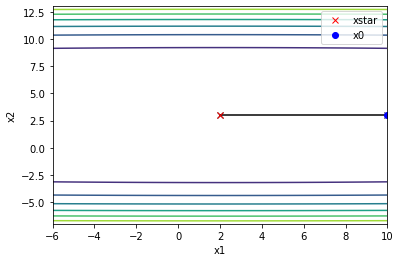

In [42]:
x0=np.array([10,3])
alpha=.5
eps=0.0001
k_max=100
sol2=Gradient_pas_fixe_hist(f24,grad_f24,x0,alpha,eps,k_max)
plot_hist(f24,[2,3],[-8,10],sol2[4])

## Pour la fonction \begin{eqnarray}
rast(X)&=&n+||X||^2-\sum_{i=1}^n\cos(\beta x_i), \mbox{ avec } \beta=5\end{eqnarray}

 gradient_pas_fixe na pas convergé 


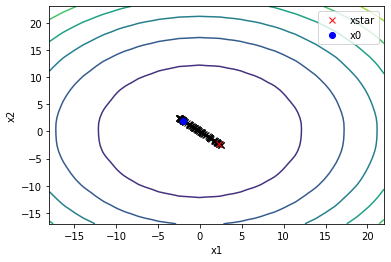

In [54]:

x0=np.array([-2,2])

sol3=Gradient_pas_fixe_hist(rast_2,grad_rast_2,x0,alpha,eps,k_max)

plot_hist(rast_2,[2,3],[-20,20],sol3[4])

## 6- Tester sur les 3 fonctions quad(𝑥1,𝑥2), 𝑓23(𝑥1,𝑥2) et 𝑟𝑎𝑠𝑡(𝑥1,𝑥2) Modifier la fonction plot_hist pour prendre en argument un titre qui permettra de savoir de quelle fonction il s'agit

In [55]:
def plot_hist_titre(fun,center,dimensions,hist,titre):
    # Titre de la fonction
    n1=50
    n2=40
    x1_=np.linspace(center[0]-dimensions[0],center[0]+dimensions[0],n1)
    x2_=np.linspace(center[1]-dimensions[1],center[1]+dimensions[1],n2)
    s_=np.zeros((n2,n1))  # s for "surface"
    sx1_,sx2_=np.meshgrid(x1_,x2_) # computes tensor products of x1 and x2
    for i in range(n1):
        for j in range (n2):
            s_[j,i]=fun(np.array([x1_[i],x2_[j]]))

    fig = plt.figure()
    fig.clf()
    plt.contour(sx1_,sx2_,s_)
    xh1=[h[0] for h in hist]
    xh2=[h[1] for h in hist]
    plt.plot(xh1,xh2,'x-k')
#    for h in hist:
#        plt.plot([h[0]],[h[1]],'x-k')
    plt.plot([xh1[-1]],[xh2[-1]],'xr',label='xstar')    
    plt.plot([xh1[0]],[xh2[0]],'ob',label='x0')
    plt.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(titre)

## Pour la fonction Fonction quadratique

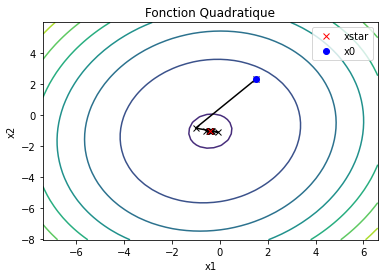

In [56]:
plot_hist_titre(quad_A_b,Xex,[-7,7],sol[4],titre='Fonction Quadratique')

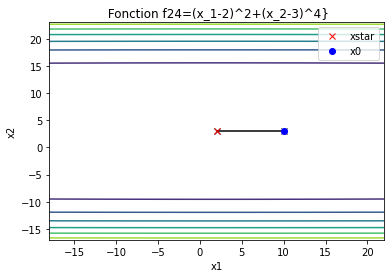

In [57]:
plot_hist_titre(f24,[2,3],[-20,20],sol2[4],titre=' Fonction f24=(x_1-2)^2+(x_2-3)^4}')

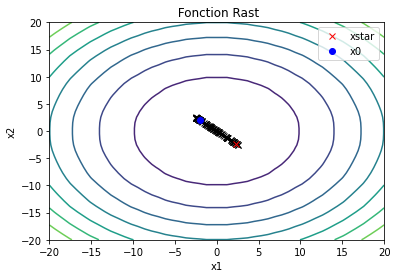

In [58]:
plot_hist_titre(rast_2,[0,0],[-20,20],sol3[4],titre=' Fonction Rast')